In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

## Democrats use social networks more often than people of other political affiliations

Overall there are more frequent social network users among democrats. 
Whereas there is only one network which has the same percentage of frequent users of both republican and democrat affiliation, which is Pinterest. Independent people fall in between democrats and republicans. However they are the most active on Youtube.

The number of democrates, republicans and idependent people in the database are not equal, therefore I had to normalize all the values to find the percentage of the people, who check their social networks multiple times per day, as percentage of all people of the same affiliation. 


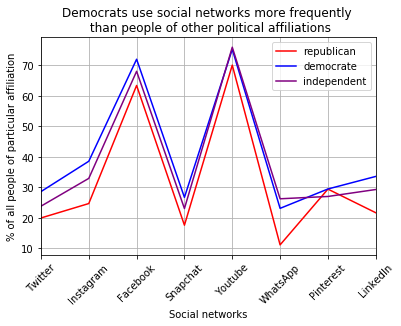

In [11]:
filt=data_Internet[(data_Internet["party"]<=3)]

data_Internet=pd.read_csv("January 3-10, 2018 - Core Trends Survey - CSV.csv")

p1=data_Internet.groupby([(data_Internet["party"]==1)]).count()
n1=list(p1['party'])[1]

p2=data_Internet.groupby([(data_Internet["party"]==2)]).count()
n2=list(p2['party'])[1]

p3=data_Internet.groupby([(data_Internet["party"]==3)]).count()
n3=list(p3['party'])[1]



users=pd.pivot_table(filt, values=['web1a', 'web1b','web1c', 'web1d','web1e', 'web1f', 'web1g', 'web1h'], index=['party'], \
aggfunc={'web1a': lambda x:''.join(x).count('1',0,-1),'web1b': lambda x:''.join(x).count('1',0,-1),\
         'web1c': lambda x:''.join(x).count('1',0,-1),'web1d': lambda x:''.join(x).count('1',0,-1),\
         'web1e': lambda x:''.join(x).count('1',0,-1),'web1f': lambda x:''.join(x).count('1',0,-1),\
         'web1g': lambda x:''.join(x).count('1',0,-1),'web1h': lambda x:''.join(x).count('1',0,-1)})
         


row =users.iloc[0].divide(n1/100)
x=row.plot(kind='line', color='red')
row =users.iloc[1].divide(n2/100)
row.plot(kind='line', color='blue')
row =users.iloc[2].divide(n3/100)
row.plot(kind='line', color='purple')

plt.legend(["republican", "democrate", "independent"], loc='upper right', frameon=True)


plt.xticks(rotation=45)
plt.grid(True)

plt.xticks((0,1,2,3,4,5,6,7), ('Twitter','Instagram', 'Facebook', 'Snapchat', \
                               'Youtube', 'WhatsApp', 'Pinterest', 'LinkedIn'))

x.set_xlabel("Social networks")
x.set_ylabel("% of all people of particular affiliation")
x.set_title("Democrats use social networks more frequently \n than people of other political affiliations")


## People without particular political affiliation hear more democrates news

People, that do not have particular political affiliation hear more often the information about Democratic party in all of the social networks.


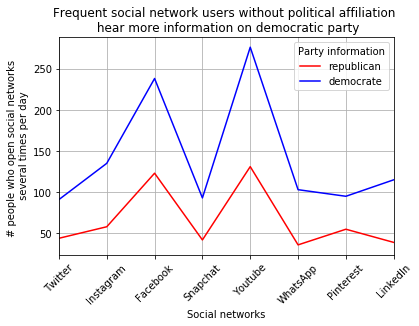

In [7]:
filt=data_Internet[(data_Internet["party"]>=3)]

users=pd.pivot_table(filt, values=['web1a', 'web1b','web1c', 'web1d','web1e', 'web1f', 'web1g', 'web1h'], index=['partyln'], \
aggfunc={'web1a': lambda x:''.join(x).count('1',0,-1),'web1b': lambda x:''.join(x).count('1',0,-1),\
         'web1c': lambda x:''.join(x).count('1',0,-1),'web1d': lambda x:''.join(x).count('1',0,-1),\
         'web1e': lambda x:''.join(x).count('1',0,-1),'web1f': lambda x:''.join(x).count('1',0,-1),\
         'web1g': lambda x:''.join(x).count('1',0,-1),'web1h': lambda x:''.join(x).count('1',0,-1)})
         

row =users.iloc[0]
x=row.plot(kind='line', color='red')
row =users.iloc[1]
row.plot(kind='line', color='blue')

plt.grid(True)

plt.legend(["republican", "democrate"], title="Party information", loc='upper right', frameon=True)
plt.xticks(rotation=45)

plt.xticks((0,1,2,3,4,5,6,7), ('Twitter','Instagram', 'Facebook', 'Snapchat', 'Youtube', 'WhatsApp', 'Pinterest', 'LinkedIn'))

x.set_xlabel("Social networks")
x.set_ylabel("# people who open social networks \n several times per day")
x.set_title("Frequent social network users without political affiliation \n hear more information on democratic party")
